

# Installing and Importing Libraries


In [ ]:
!pip install git+https://github.com/keras-team/keras-contrib.git
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-56msebw3
  Running command git clone -q https://github.com/keras-team/keras-contrib.git /tmp/pip-req-build-56msebw3
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101076 sha256=03871cd8ec96d1a8e4a3aa46118c40322e71125ac03713a454aed37fb617c70c
  Stored in directory: /tmp/pip-ephem-wheel-cache-xj9kraw4/wheels/ff/ca/2d/4d30abe9cb189a7e1edcc159a7bca00d4131d78346d8466a5d
Successfully built keras-contrib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import optim, nn
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import models, datasets,transforms
from torchvision.utils import make_grid
from sklearn.metrics import f1_score   
import os
import zipfile
from torchsummary import summary
import shutil
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import keract
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras_contrib.callbacks import CyclicLR


<b>Retrieve Tiny Imagenet data directly from Stanford data source

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
  
# Unzip raw zip file
!unzip -qq 'tiny-imagenet-200.zip'

# Define main data directory
DATA_DIR = 'tiny-imagenet-200' 



--2022-12-21 12:54:39--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  49.3MB/s    in 5.8s    

2022-12-21 12:54:45 (40.8 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



<b>Getting the path of the dataset folder "train"



In [ ]:
dir_list = os.listdir("tiny-imagenet-200/train")
print("Classes Present in train folder", len(dir_list))

Classes Present in train folder 200


To Moving data and labels to GPU if available

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

Defining training and test data paths

In [ ]:
TRAIN_DIR = os.path.join(DATA_DIR, 'train') 
TEST_DIR = os.path.join(DATA_DIR, 'test')

Transformation applied on Train & Test Data

In [ ]:
transform = transforms.Compose([
	transforms.Resize((255,255)),
  transforms.CenterCrop(224),
	transforms.ToTensor(),
  transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

In [ ]:
trainData = datasets.ImageFolder(TRAIN_DIR, transform=transform)
testData = datasets.ImageFolder(TEST_DIR, transform=transform)

<b>Exploring Dataset

In [ ]:
print("Train Dataset Size: ", len(trainData))
print("Test Dataset Size: ", len(testData))

Train Dataset Size:  100000
Test Dataset Size:  10000


In [ ]:
classes = trainData.classes
print("Number of classes = ", len(classes))
print(classes)

Number of classes =  200
['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789',

Shape of an Image tensor from dataset

In [ ]:
image, label = trainData[0]
image.shape

torch.Size([3, 224, 224])

Label (numeric): 0
Label (textual): n01443537


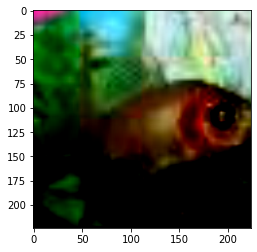

In [ ]:
image, label = trainData[0]
plt.imshow(image.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

<b>Creating DataLoaders to load the data in batches

In [ ]:
batch_size = 50
trainLoader = DataLoader(trainData, batch_size=batch_size, shuffle=True)
testLoader = DataLoader(testData, batch_size=batch_size, shuffle=True)

<b>Visualizing the Batch Data

Images Shape: torch.Size([50, 3, 224, 224])


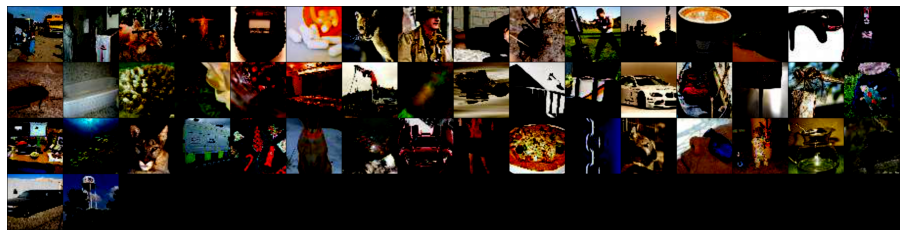

In [ ]:
for images, labels in trainLoader:
    print('Images Shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

<b>Train and Test data

In [ ]:
train_labels =trainData.classes
test_labels= testData.classes
train_images = trainData.imgs
test_images= testData.imgs

## <b>Using Pretrained Inceptionv4 model

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 4.9 MB/s 
     |████████████████████████████████| 182 kB 93.6 MB/s 


In [ ]:
import timm
model = timm.create_model('inception_v4', pretrained=True)
model.eval()

#model = models.resnet50(pretrained=True)
model = model.to(device)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/inceptionv4-8e4777a0.pth" to /root/.cache/torch/hub/checkpoints/inceptionv4-8e4777a0.pth


In [ ]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 111, 111]             864
       BatchNorm2d-2         [-1, 32, 111, 111]              64
              ReLU-3         [-1, 32, 111, 111]               0
       BasicConv2d-4         [-1, 32, 111, 111]               0
            Conv2d-5         [-1, 32, 109, 109]           9,216
       BatchNorm2d-6         [-1, 32, 109, 109]              64
              ReLU-7         [-1, 32, 109, 109]               0
       BasicConv2d-8         [-1, 32, 109, 109]               0
            Conv2d-9         [-1, 64, 109, 109]          18,432
      BatchNorm2d-10         [-1, 64, 109, 109]             128
             ReLU-11         [-1, 64, 109, 109]               0
      BasicConv2d-12         [-1, 64, 109, 109]               0
        MaxPool2d-13           [-1, 64, 54, 54]               0
           Conv2d-14           [-1, 96,

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
model.train()

n_epochs = 4

for epoch in range(n_epochs):
  n_correct =0.0
  r_loss=0.0

  for i, (images, labels) in enumerate(trainLoader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        output = model(images)
        output_label = torch.argmax(output,dim=1)

        n_correct+= (labels==output_label).sum().item()

        optimizer.zero_grad()

        loss = loss_function(output, labels)
        r_loss += loss.item()*images.size(0)

        # Backward and optimize
        loss.backward()
        optimizer.step()

  print(f'Epoch:{epoch} Loss :{r_loss/len(trainData)}  Accuracy :{n_correct/len(trainData)*100}%')
print("Training Completed")

Epoch:0 Loss :3.5337412234544754  Accuracy :20.074%
Epoch:1 Loss :2.6099902805685997  Accuracy :36.461%
Epoch:2 Loss :2.1891922881603243  Accuracy :45.395%
Epoch:3 Loss :1.8851182312965393  Accuracy :51.93299999999999%
Training Completed


In [ ]:
image, label = trainData[0]
image.shape

torch.Size([3, 224, 224])

In [ ]:
num_classes = len(classes)

**Finetuning Model**

- Cross-Entropy as the final classification loss function
- Used Adam optimzer
- Train with 10 epoch

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
 torch.cuda.empty_cache()

In [ ]:
model.train()
confusion_matrix = torch.zeros(len(classes), len(classes))    
correct_predction = {label: 0 for label in classes}
total_predction = {label: 0 for label in classes}

#Number of epochs used =6
n_epochs = 10

for epoch in range(n_epochs):
  n_correct =0.0
  r_loss=0.0

  for i, (images, labels) in enumerate(trainLoader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        output = model(images)
        output_label = torch.argmax(output,dim=1)

        n_correct+= (labels==output_label).sum().item()

        #Confusion matrix
        for t, p in zip(labels.view(-1), output_label.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

        optimizer.zero_grad()

        loss = loss_function(output, labels)
        r_loss += loss.item()*images.size(0)

        # Backward and optimize
        loss.backward()
        optimizer.step()
  
  print(f'Epoch:{epoch} Loss :{r_loss/len(trainData)} f1 Score :{f1_score} Accuracy :{n_correct/len(trainData)*100}%')
print("Completed")

Epoch:0 Loss :1.6232799718081952 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :57.735%
Epoch:1 Loss :1.359513229250908 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :63.725%
Epoch:2 Loss :1.1248594853430987 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :69.1%
Epoch:3 Loss :0.9150291788429021 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :74.239%
Epoch:4 Loss :0.7377661471515894 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :78.606%
Epoch:5 Loss :0.5956146890223026 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :82.307%
Epoch:6 Loss :0.4869673349559307 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :85.17%
Epoch:7 Loss :0.420194167278707 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :86.979%
Epoch:8 Loss :0.35754248057305815 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :88.838%
Epoch:9 Loss :0.3264293541871011 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :89.75%
Completed


In [ ]:
print(confusion_matrix)

tensor([[4.4370e+03, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         1.0000e+00],
        [0.0000e+00, 4.5640e+03, 6.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         2.0000e+00],
        [1.0000e+00, 7.0000e+00, 3.9330e+03,  ..., 3.0000e+00, 4.0000e+00,
         2.3000e+01],
        ...,
        [0.0000e+00, 0.0000e+00, 1.0000e+01,  ..., 2.8890e+03, 5.5300e+02,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.0000e+00,  ..., 3.7400e+02, 3.5560e+03,
         0.0000e+00],
        [0.0000e+00, 1.0000e+00, 1.0000e+01,  ..., 0.0000e+00, 0.0000e+00,
         3.8600e+03]])


In [ ]:
# recall score
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix.numpy(), axis = 1) # axis 1 means column values
print("Recall Score: ", recall)

Recall Score:  [0.8874 0.9128 0.7866 0.7068 0.7636 0.7432 0.8656 0.7382 0.893  0.817
 0.7224 0.8112 0.863  0.8618 0.804  0.7484 0.6752 0.8012 0.761  0.787
 0.8758 0.898  0.8752 0.92   0.743  0.837  0.7214 0.6392 0.8262 0.7214
 0.6974 0.8492 0.693  0.7472 0.8082 0.7794 0.8848 0.7658 0.8306 0.7516
 0.7604 0.7632 0.7136 0.7738 0.958  0.9416 0.7312 0.827  0.6326 0.6656
 0.83   0.795  0.8862 0.8014 0.8194 0.8218 0.7438 0.8558 0.9124 0.7768
 0.8402 0.8468 0.7412 0.745  0.6148 0.7134 0.8696 0.6954 0.8254 0.766
 0.7774 0.87   0.745  0.7148 0.8224 0.6922 0.8096 0.666  0.8522 0.6716
 0.6452 0.9206 0.821  0.713  0.7436 0.757  0.7398 0.7856 0.6936 0.7944
 0.8366 0.8762 0.7818 0.7712 0.7418 0.768  0.7532 0.8104 0.827  0.6076
 0.654  0.7876 0.7002 0.9078 0.6658 0.731  0.7064 0.8826 0.889  0.8518
 0.7862 0.8786 0.7504 0.7694 0.7664 0.9124 0.7934 0.8404 0.85   0.7448
 0.7562 0.8432 0.635  0.6794 0.8874 0.7126 0.8326 0.7494 0.7732 0.7736
 0.7506 0.4718 0.5776 0.8524 0.7516 0.6528 0.8092 0.7014 0.6814 0

In [ ]:
# precision score
precision = np.diag(confusion_matrix.numpy()) / np.sum(confusion_matrix.numpy(), axis = 0) # axis 0 means row values
print("Precision Score: ",precision)

Precision Score:  [0.8737692  0.9104329  0.7848733  0.7137952  0.7346546  0.7316401
 0.83989906 0.7411647  0.887674   0.8038174  0.7313221  0.82522887
 0.82552135 0.83313996 0.8048048  0.7677472  0.7005603  0.7789228
 0.74243903 0.78230613 0.8577865  0.91278714 0.86482215 0.9007245
 0.74733454 0.8422218  0.7343241  0.69057906 0.8173724  0.736423
 0.71763736 0.8206417  0.7184325  0.7440749  0.81389725 0.77168316
 0.89139634 0.7825465  0.8101834  0.76320064 0.7334105  0.7678068
 0.7156037  0.77894104 0.9597275  0.93043476 0.73369455 0.816387
 0.6678632  0.71248126 0.80317396 0.8001208  0.8590539  0.79456675
 0.8145129  0.8020691  0.7558943  0.84199136 0.9033663  0.7797631
 0.7976077  0.8246981  0.74793136 0.74604446 0.63108194 0.6707409
 0.86047894 0.73712105 0.8035436  0.73217356 0.79586405 0.8684368
 0.76677644 0.7524211  0.78518236 0.7201415  0.8274734  0.6777936
 0.8327145  0.7131026  0.70145684 0.90842706 0.7960054  0.7266612
 0.7437487  0.7550369  0.74636805 0.7636081  0.7226505  0

In [ ]:
# F1 score
F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score for the classes: ", F1)

F1 Score for the classes:  [0.88053185 0.9116149  0.78573567 0.71028036 0.7488477  0.7373747
 0.8525559  0.7396794  0.890329   0.81035507 0.72683364 0.81815434
 0.8438447  0.8472277  0.80440223 0.7579502  0.6876464  0.78990436
 0.7516049  0.78464603 0.86669964 0.90533316 0.8699801  0.9102602
 0.74516094 0.83960277 0.72780466 0.6638969  0.8217625  0.72883415
 0.707374   0.8346766  0.70548713 0.7456342  0.8110386  0.7755224
 0.8880859  0.77408266 0.8202647  0.7573559  0.7466614  0.76549643
 0.71460044 0.776362   0.958863   0.9359841  0.7324451  0.8216592
 0.6497535  0.68824315 0.8163667  0.79755217 0.87241584 0.7979687
 0.8169491  0.81181467 0.74979836 0.84883946 0.9078607  0.7782787
 0.8183501  0.83560294 0.74455047 0.74552184 0.62283456 0.69141304
 0.86501545 0.71565294 0.81432515 0.74870497 0.7865237  0.8692177
 0.7557314  0.73312825 0.80336034 0.70589435 0.8184391  0.6718451
 0.8423445  0.6917293  0.6721534  0.914473   0.8083096  0.7197658
 0.7436743  0.7560172  0.74306947 0.7744479 

## **<b>Using Pretrained ResNet50 model**

In [ ]:
model = models.resnet50(pretrained=True)
model = model.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [ ]:
model.train()

n_epochs = 4

for epoch in range(n_epochs):
  n_correct =0.0
  r_loss=0.0

  for i, (images, labels) in enumerate(trainLoader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        output = model(images)
        output_label = torch.argmax(output,dim=1)

        n_correct+= (labels==output_label).sum().item()

        optimizer.zero_grad()

        loss = loss_function(output, labels)
        r_loss += loss.item()*images.size(0)

        # Backward and optimize
        loss.backward()
        optimizer.step()

  print(f'Epoch:{epoch} Loss :{r_loss/len(trainData)}  Accuracy :{n_correct/len(trainData)*100}%')
print("Training Completed")

Epoch:0 Loss :2.593550773024559  Accuracy :43.015%
Epoch:1 Loss :1.8883067108690739  Accuracy :55.106%
Epoch:2 Loss :1.787212560147047  Accuracy :57.245999999999995%
Epoch:3 Loss :1.7216380372941493  Accuracy :58.414%
Training Completed


In [ ]:
image, label = trainData[0]
image.shape

torch.Size([3, 224, 224])

In [ ]:
num_classes = len(classes)

**Finetuning Model**

- Cross-Entropy as the final classification loss function
- Used Adam optimzer
- Train with 10 epoch


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [ ]:
 torch.cuda.empty_cache()

In [ ]:
model.train()
confusion_matrix = torch.zeros(len(classes), len(classes))    
correct_predction = {label: 0 for label in classes}
total_predction = {label: 0 for label in classes}

#Number of epochs used =6
n_epochs = 10

for epoch in range(n_epochs):
  n_correct =0.0
  r_loss=0.0

  for i, (images, labels) in enumerate(trainLoader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        output = model(images)
        output_label = torch.argmax(output,dim=1)

        n_correct+= (labels==output_label).sum().item()

        #Confusion matrix
        for t, p in zip(labels.view(-1), output_label.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

        optimizer.zero_grad()

        loss = loss_function(output, labels)
        r_loss += loss.item()*images.size(0)

        # Backward and optimize
        loss.backward()
        optimizer.step()
  
  print(f'Epoch:{epoch} Loss :{r_loss/len(trainData)} f1 Score :{f1_score} Accuracy :{n_correct/len(trainData)*100}%')
print("Completed")

Epoch:0 Loss :1.6845587978959085 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :59.226%
Epoch:1 Loss :1.6237006556391715 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :60.346999999999994%
Epoch:2 Loss :1.586233625650406 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :61.14000000000001%
Epoch:3 Loss :1.5583163157999516 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :61.572%
Epoch:4 Loss :1.5227739850878717 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :62.419999999999995%
Epoch:5 Loss :1.4987516435086727 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :62.671%
Epoch:6 Loss :1.4696127632260323 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :63.339999999999996%
Epoch:7 Loss :1.4406559165269137 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :63.834%
Epoch:8 Loss :1.4162036662697792 f1 Score :<function f1_score at 0x7f7c910c6790> Accuracy :64.16%
Epoch:9 Loss :1.3988551270365714 f1 Score :<function f1_score at

In [ ]:
print(confusion_matrix)

tensor([[4.2450e+03, 1.0000e+00, 2.0000e+00,  ..., 2.0000e+00, 0.0000e+00,
         6.0000e+00],
        [1.0000e+00, 4.1900e+03, 2.7000e+01,  ..., 1.0000e+00, 0.0000e+00,
         1.4000e+01],
        [1.0000e+00, 4.8000e+01, 2.9240e+03,  ..., 1.8000e+01, 1.3000e+01,
         2.4000e+01],
        ...,
        [3.0000e+00, 0.0000e+00, 1.2000e+01,  ..., 2.0430e+03, 4.5400e+02,
         1.0000e+01],
        [1.1000e+01, 0.0000e+00, 6.0000e+00,  ..., 4.0700e+02, 2.7500e+03,
         2.0000e+00],
        [1.3000e+01, 1.3000e+01, 3.8000e+01,  ..., 0.0000e+00, 0.0000e+00,
         2.9640e+03]])


In [ ]:
# recall score
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix.numpy(), axis = 1) # axis 1 means column values
print("Recall Score: ", recall)

Recall Score:  [0.849  0.838  0.5848 0.4856 0.5978 0.5262 0.788  0.546  0.7416 0.6456
 0.6014 0.7006 0.7148 0.7756 0.758  0.5782 0.4968 0.653  0.6066 0.5914
 0.7546 0.8008 0.7722 0.8376 0.5768 0.7232 0.6662 0.5086 0.7282 0.5778
 0.5074 0.6708 0.5166 0.5694 0.6742 0.67   0.7568 0.5822 0.71   0.5458
 0.5048 0.5638 0.5004 0.602  0.9184 0.8534 0.5904 0.6868 0.5176 0.4954
 0.7212 0.652  0.754  0.6506 0.6824 0.6554 0.5802 0.7026 0.8616 0.68
 0.7114 0.6918 0.559  0.5284 0.4334 0.4988 0.7142 0.5452 0.6564 0.5582
 0.5638 0.7252 0.5934 0.583  0.642  0.4744 0.6398 0.4922 0.7396 0.4374
 0.4096 0.8364 0.663  0.5684 0.521  0.5918 0.5742 0.5688 0.5464 0.6202
 0.715  0.7806 0.6706 0.6758 0.5336 0.5522 0.5404 0.6246 0.6416 0.4064
 0.4662 0.6384 0.5196 0.8456 0.5334 0.4952 0.4622 0.748  0.7604 0.719
 0.6484 0.7196 0.5494 0.6244 0.5394 0.8448 0.5614 0.7202 0.7018 0.5176
 0.439  0.6986 0.4832 0.4894 0.7612 0.5452 0.7336 0.528  0.6036 0.65
 0.5972 0.2954 0.3508 0.712  0.6032 0.4646 0.5754 0.4666 0.498  0.4

In [ ]:
# precision score
precision = np.diag(confusion_matrix.numpy()) / np.sum(confusion_matrix.numpy(), axis = 0) # axis 0 means row values
print("Precision Score: ",precision)

Precision Score:  [0.8229934  0.8146996  0.5468487  0.49149796 0.5522912  0.5150744
 0.7511916  0.5475331  0.7433841  0.62412995 0.6109305  0.6944885
 0.660995   0.75624025 0.7527309  0.59084404 0.5228373  0.62025076
 0.60286224 0.5699692  0.73433244 0.7927143  0.75424886 0.7963491
 0.6046122  0.7163233  0.66460496 0.5486516  0.72242063 0.6006237
 0.5459436  0.650126   0.54597336 0.5837605  0.6644983  0.6652105
 0.76152146 0.6021928  0.6776102  0.5526529  0.5053053  0.5749541
 0.51019573 0.5974593  0.9102081  0.8320983  0.58478606 0.6674441
 0.52956825 0.5222433  0.7052611  0.6495318  0.7304786  0.6463342
 0.6704657  0.63348156 0.5728673  0.68068206 0.8399298  0.6968641
 0.68076557 0.6542463  0.5579956  0.5270297  0.45051974 0.48091015
 0.6923226  0.57112926 0.6328577  0.53745425 0.5676601  0.7205882
 0.6084906  0.60302025 0.6041784  0.5133088  0.64587116 0.5116424
 0.70559055 0.49715844 0.46747318 0.7906977  0.6311881  0.5835729
 0.5323932  0.592986   0.5857988  0.5721183  0.5835113  

In [ ]:
# F1 score
F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score for the classes: ", F1)

F1 Score for the classes:  [0.8357944  0.8261856  0.56518793 0.48853117 0.57414526 0.5205778
 0.7691557  0.5467655  0.742491   0.6346835  0.60612774 0.69753087
 0.68684536 0.76579773 0.75535625 0.58445364 0.5094862  0.6362042
 0.60472536 0.5804869  0.7443283  0.79673666 0.76311886 0.8164539
 0.59037864 0.7197453  0.6654015  0.52786714 0.7252988  0.58899087
 0.52596664 0.66030115 0.53088063 0.5764908  0.66931397 0.66759664
 0.75915337 0.59202766 0.6934271  0.5492051  0.50505245 0.5693224
 0.5052504  0.5997211  0.9142857  0.8426146  0.5875796  0.6769837
 0.52351576 0.5084677  0.71314156 0.6507636  0.7420529  0.6484601
 0.6763802  0.64425445 0.5765103  0.6914674  0.85062695 0.6883288
 0.6957457  0.6724993  0.5584974  0.52771395 0.44179413 0.48969173
 0.7030912  0.55786353 0.6444139  0.5476307  0.5657235  0.72288674
 0.6008506  0.59284115 0.6225153  0.49308807 0.6428212  0.5017329
 0.7221951  0.46536866 0.43662724 0.812907   0.64670306 0.5758865
 0.52663505 0.5923924  0.57994145 0.5704543 

## **<b>Using Pretrained VGG-19 model**

In [ ]:
# Define main data directory
DATA_DIR = 'tiny-imagenet-200'
train_data_dir = 'tiny-imagenet-200/train'  
validation_data_dir = 'tiny-imagenet-200/val' 
test_data_dir = 'tiny-imagenet-200/test'

In [ ]:
img_width, img_height = 64, 64 
channels = 3
batch_size = 64

In [ ]:
val_data = pd.read_csv(validation_data_dir + '/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(3)

,File,Class
0,val_0.JPEG,n03444034
1,val_1.JPEG,n04067472
2,val_2.JPEG,n04070727


In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
)

datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(  
    train_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,  
    class_mode= 'categorical',
    shuffle= True, 
    seed= 42
) 

valid_generator = datagen.flow_from_dataframe(
    dataframe= val_data, 
    directory= validation_data_dir + '/images',
    x_col= 'File', 
    y_col= 'Class', 
    target_size= (img_width, img_height),
    color_mode= 'rgb', 
    class_mode= 'categorical', 
    batch_size= batch_size, 
    shuffle= True, 
    seed= 42
)

test_generator = datagen.flow_from_directory(  
    test_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,
    class_mode= None,
    shuffle= False, 
)

Found 100000 images belonging to 200 classes.
Found 10000 validated image filenames belonging to 200 classes.
Found 10000 images belonging to 1 classes.


In [ ]:
num_classes = len(train_generator.class_indices)  
train_labels = train_generator.classes 
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = valid_generator.classes 
valid_labels = to_categorical(valid_labels, num_classes=num_classes)
nb_train_samples = len(train_generator.filenames)  
nb_valid_samples = len(valid_generator.filenames)
nb_test_samples = len(test_generator.filenames)

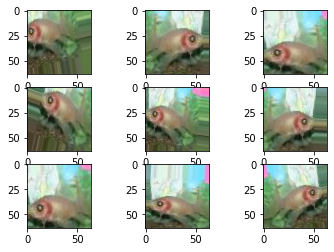

In [ ]:
img = load_img('/content/tiny-imagenet-200/train/n01443537/images/n01443537_0.JPEG')
data = img_to_array(img)
samples = expand_dims(data, 0)
it = train_datagen.flow(samples, batch_size=1)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)

plt.savefig('augmented_image.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

# Model
* Modified vgg19 CNN architecture is used for the problem.
* Pretrained on the 'ImageNet' dataset.

In [ ]:
vgg19 = applications.VGG19(include_top= False, input_shape= (img_width, img_height, channels), weights= 'imagenet')
vgg19.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
model = Sequential()

for layer in vgg19.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable= False

model.add(Flatten(input_shape= (2, 2, 512)))

model.add(Dense(512, activation= 'relu', name= 'FC1'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512, activation= 'relu', name= 'FC2'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(200, activation= 'softmax', name= 'FC3'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)       2

# Baseline Model Training
* Cyclical LR in range of 1e-4 to 6e-4 with a step size of 1404.

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.0001, epsilon= 1e-08), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
my_callbacks = [
    EarlyStopping(monitor= 'val_accuracy', mode= 'auto', patience=2),
    CyclicLR(base_lr=0.0001, max_lr=0.0006, step_size=1404., mode= 'triangular2'),
    ModelCheckpoint(filepath= 'baseline_model.h5', monitor= 'val_accuracy', save_best_only= True, mode= 'auto')
]

In [ ]:
history = model.fit(
    train_generator, 
    epochs= 3,
    steps_per_epoch = nb_train_samples//batch_size, 
    validation_data = valid_generator, 
    validation_steps = nb_valid_samples//batch_size,
    verbose = 2, 
    callbacks = my_callbacks,
    shuffle = True
)

Epoch 1/3
1562/1562 - 152s - loss: 4.9597 - accuracy: 0.0616 - val_loss: 3.7376 - val_accuracy: 0.1767 - lr: 5.4373e-04 - 152s/epoch - 98ms/step
Epoch 2/3
1562/1562 - 150s - loss: 4.0942 - accuracy: 0.1323 - val_loss: 3.4210 - val_accuracy: 0.2328 - lr: 1.5627e-04 - 150s/epoch - 96ms/step
Epoch 3/3
1562/1562 - 149s - loss: 3.9328 - accuracy: 0.1541 - val_loss: 3.3893 - val_accuracy: 0.2317 - lr: 2.6560e-04 - 149s/epoch - 96ms/step


In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(valid_generator, batch_size= batch_size, verbose= 1)
print('Validation Loss: ', eval_loss)
print('Validation Accuracy: ', eval_accuracy)

157/157 [==============================] - 5s 30ms/step - loss: 3.3885 - accuracy: 0.2318
Validation Loss:  3.388522148132324
Validation Accuracy:  0.23180000483989716


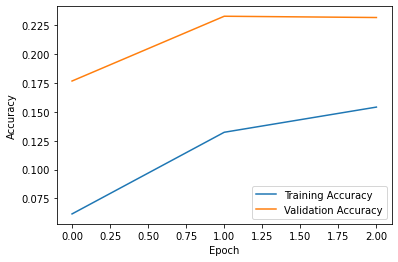

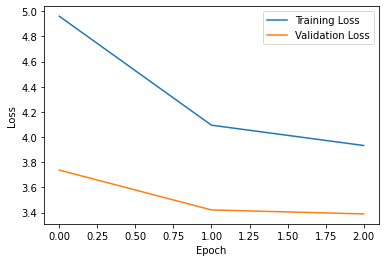

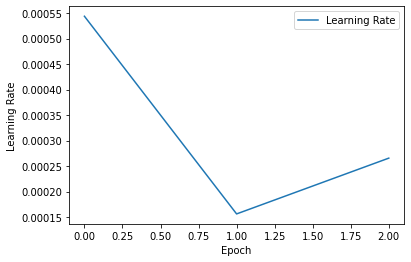

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('base_acc_epoch.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('base_loss_epoch.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.plot(history.history['lr'])
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Learning Rate'])
plt.savefig('base_lr_epoch.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

# Finetuning
* Cyclical LR in range of 1e-5 to 6e-5 with a setp size of 1200.
* Further, reducing cyclical LR in the range of 6e-6 to 6e-6, keeping the step size same.

In [ ]:
model.trainable= True
model.compile(optimizer= keras.optimizers.Adam(1e-5), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
my_callbacks = [
    CyclicLR(base_lr= 0.00001, max_lr= 0.00006, step_size= 1200., mode= 'triangular2'),
    ModelCheckpoint(filepath= 'finetuned_model_v1.h5', monitor= 'val_accuracy', save_best_only= True, mode= 'auto')
]

In [ ]:
history_1= model.fit(
    train_generator, 
    epochs= 15, 
    steps_per_epoch= nb_train_samples//batch_size, 
    validation_data= valid_generator, 
    validation_steps= nb_valid_samples//batch_size,
    verbose= 2, 
    callbacks= my_callbacks
)

Epoch 1/15
1562/1562 - 153s - loss: 3.2929 - accuracy: 0.2418 - val_loss: 2.7166 - val_accuracy: 0.3504 - lr: 4.4917e-05 - 153s/epoch - 98ms/step
Epoch 2/15
1562/1562 - 151s - loss: 2.7297 - accuracy: 0.3508 - val_loss: 2.4799 - val_accuracy: 0.4080 - lr: 2.5083e-05 - 151s/epoch - 97ms/step
Epoch 3/15
1562/1562 - 151s - loss: 2.5626 - accuracy: 0.3864 - val_loss: 2.2716 - val_accuracy: 0.4509 - lr: 1.2375e-05 - 151s/epoch - 97ms/step
Epoch 4/15
1562/1562 - 151s - loss: 2.3474 - accuracy: 0.4340 - val_loss: 2.2071 - val_accuracy: 0.4626 - lr: 1.9917e-05 - 151s/epoch - 97ms/step
Epoch 5/15
1562/1562 - 151s - loss: 2.2242 - accuracy: 0.4588 - val_loss: 2.0835 - val_accuracy: 0.4906 - lr: 1.3177e-05 - 151s/epoch - 97ms/step
Epoch 6/15
1562/1562 - 151s - loss: 2.1409 - accuracy: 0.4769 - val_loss: 2.1035 - val_accuracy: 0.4877 - lr: 1.1187e-05 - 151s/epoch - 96ms/step
Epoch 7/15
1562/1562 - 151s - loss: 2.0450 - accuracy: 0.5012 - val_loss: 2.0727 - val_accuracy: 0.4925 - lr: 1.2776e-05 - 1

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(valid_generator, batch_size= batch_size, verbose= 1)
print('Validation Loss: ', eval_loss)
print('Validation Accuracy: ', eval_accuracy)

157/157 [==============================] - 4s 26ms/step - loss: 1.9604 - accuracy: 0.5296
Validation Loss:  1.9604045152664185
Validation Accuracy:  0.5296000242233276


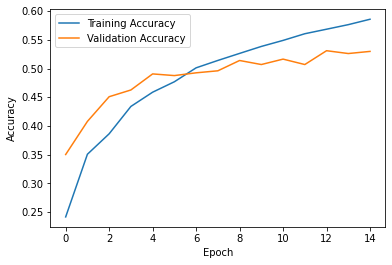

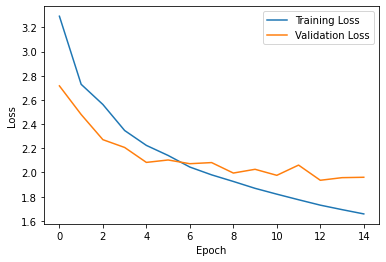

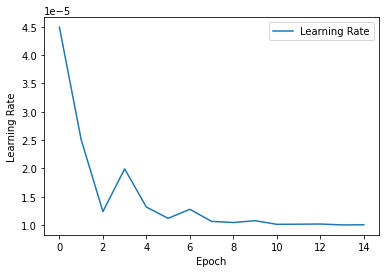

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('finetune_acc_epoch_v1.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('finetuned_loss_epoch_v1.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.plot(history_1.history['lr'])
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Learning Rate'])
plt.savefig('finetuned_lr_epoch_v1.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(1e-6), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
my_callbacks = [
    CyclicLR(base_lr=0.000001, max_lr=0.000006, step_size=1200., mode= 'triangular2'),
    ModelCheckpoint(filepath= 'finetuned_model_v2.h5', monitor= 'val_accuracy', save_best_only= True, mode= 'auto')
]

In [ ]:
history_2 = model.fit(
    train_generator, 
    epochs= 15, 
    steps_per_epoch= nb_train_samples//batch_size, 
    validation_data= valid_generator, 
    validation_steps= nb_valid_samples//batch_size,
    verbose= 2, 
    callbacks= my_callbacks
)

Epoch 1/15
1562/1562 - 152s - loss: 1.5634 - accuracy: 0.6071 - val_loss: 2.0108 - val_accuracy: 0.5166 - lr: 4.4917e-06 - 152s/epoch - 98ms/step
Epoch 2/15
1562/1562 - 151s - loss: 1.5271 - accuracy: 0.6165 - val_loss: 1.8712 - val_accuracy: 0.5477 - lr: 2.5083e-06 - 151s/epoch - 97ms/step
Epoch 3/15
1562/1562 - 150s - loss: 1.5072 - accuracy: 0.6196 - val_loss: 1.8897 - val_accuracy: 0.5450 - lr: 1.2375e-06 - 150s/epoch - 96ms/step
Epoch 4/15
1562/1562 - 151s - loss: 1.4856 - accuracy: 0.6253 - val_loss: 1.9568 - val_accuracy: 0.5305 - lr: 1.9917e-06 - 151s/epoch - 96ms/step
Epoch 5/15
1562/1562 - 150s - loss: 1.4772 - accuracy: 0.6269 - val_loss: 1.9071 - val_accuracy: 0.5416 - lr: 1.3177e-06 - 150s/epoch - 96ms/step
Epoch 6/15
1562/1562 - 150s - loss: 1.4651 - accuracy: 0.6292 - val_loss: 1.8918 - val_accuracy: 0.5412 - lr: 1.1187e-06 - 150s/epoch - 96ms/step
Epoch 7/15
1562/1562 - 150s - loss: 1.4519 - accuracy: 0.6340 - val_loss: 1.9105 - val_accuracy: 0.5404 - lr: 1.2776e-06 - 1

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(valid_generator, batch_size= batch_size, verbose= 1)
print('Validation Loss: ', eval_loss)
print('Validation Accuracy: ', eval_accuracy)

157/157 [==============================] - 4s 26ms/step - loss: 1.8913 - accuracy: 0.5470
Validation Loss:  1.8913215398788452
Validation Accuracy:  0.546999990940094


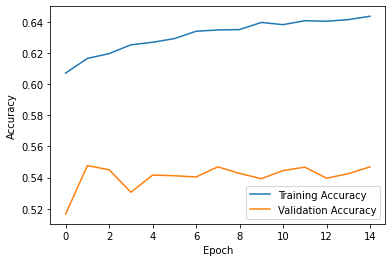

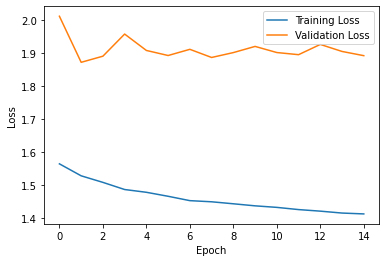

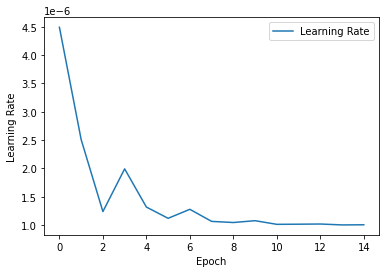

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('finetune_acc_epoch_v2.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('finetuned_loss_epoch_v2.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.plot(history_2.history['lr'])
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Learning Rate'])
plt.savefig('finetuned_lr_epoch_v2.png', transparent= True, bbox_inches= 'tight', dpi= 900)
plt.show()

# Predictions on Test Set

In [ ]:
def getListKeys(dict): 
    list = [] 
    for key in dict.keys(): 
        list.append(key) 
    return np.asarray(list)

labels = getListKeys(train_generator.class_indices)

filenames = np.array([])
file_names = test_generator.filenames
for file in file_names:
    temp = file.split('/')
    filenames = np.append(filenames, temp[1])

In [ ]:
predict = model.predict(test_generator)
predicted_class_indices= np.argmax(predict,axis=1)
predictions= np.asarray([labels[i] for i in predicted_class_indices])

test_df = pd.DataFrame()
test_df['file_name'] = filenames
test_df['category'] = predictions
test_df.to_csv('test_predictions.csv', index= False)

157/157 [==============================] - 4s 26ms/step


# Visualizing Layers

In [ ]:
image = load_img('/content/tiny-imagenet-200/train/n01641577/images/n01641577_0.JPEG', target_size= (64, 64))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
y_hat = model.predict(image)

1/1 [==============================] - 0s 231ms/step


**Conclusion:**

We craeted 3 pretrained model on tiny image data. After model evalution we can conclude that InceptionV4 outperformed than other model. Its given Accuracy :89.75% in 10 epoch, while other model not giving decent model performce.